In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from DAFD.rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from DAFD.helper_scripts.ModelHelper import ModelHelper
from tqdm import tqdm

Using TensorFlow backend.


regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238



In [2]:
all_results = pd.read_csv("20210423_robustness_designspace.csv")

In [ ]:
# filt_results = all_results.loc[all_results["regime"] == 1, :]
# filt_results = filt_results.loc[all_results["generation_rate"] >= 49,:]
# filt_results = filt_results.loc[all_results["generation_rate"] <= 51,:]
# filt_results = filt_results.loc[all_results["droplet_size"] >= 99,:]
# filt_results = filt_results.loc[all_results["droplet_size"] <= 101,:]
# filt_results = filt_results.reset_index()

In [ ]:
# MH = ModelHelper()

# inferred = np.zeros(filt_results.shape[0])
# oil_flow = np.zeros(filt_results.shape[0])
# water_flow = np.zeros(filt_results.shape[0])

# for i, row in tqdm(filt_results.iterrows(), position=0, leave=True):
#     oil_flow[i], water_flow[i], inferred[i] = MH.calculate_formulaic_relations(row.to_dict())

In [ ]:
# new_results = pd.DataFrame({"inferred_diameter": inferred, "oil_flow_rate": oil_flow, "water_flow_rate": water_flow})
# filt_results = pd.concat([filt_results, new_results], axis=1)


In [ ]:

# percent_difference_all = np.abs((filt_results.loc[:, "inferred_diameter"] - filt_results.loc[:, "droplet_size"])/filt_results.loc[:, "droplet_size"])*100
# filt_results = pd.concat([filt_results, pd.DataFrame({"diff": percent_difference_all})], axis=1)



In [ ]:
# thresh = filt_results.loc[filt_results.loc[:,"diff"]<=10, :]
# thresh = thresh.loc[thresh.oil_flow_rate >= 1, :]
# thresh = thresh.loc[thresh.water_flow_rate >= 1.5, :]


# thresh.sort_values("score_flow")


In [ ]:
# thresh.to_csv("20210426_100Hz_100um_robustness.csv")

In [ ]:
# thresh.sort_values("score_flow").reset_index().iloc[20,:].to_dict()

In [3]:
all_results = all_results.loc[all_results.loc[:,"generation_rate"] > 1, :]
# good.sort_values("score")

In [14]:
all_results.sort_values("droplet_size").drop("Unnamed: 0", axis=1).loc[:, "droplet_size"]

1804327      8.979333
1800562      9.022082
1819312      9.170011
1823077      9.243630
1838212      9.529261
1785577      9.625417
1823227      9.933009
1912912     10.040814
1747927     10.208162
1893997     10.225739
1912747     10.269033
1781662     10.360950
1762912     10.457717
1766827     10.472058
1838062     10.493963
1894012     10.891214
922777      10.903814
1781647     10.917578
964927      10.919529
922627      11.090048
1800547     11.105574
956677      11.170865
956512      11.207821
1785592     11.227660
950092      11.231528
1804177     11.287820
922612      11.297906
1804477     11.314219
1931662     11.314887
1785427     11.343527
              ...    
4204057    374.913818
4207508    374.981903
4203006    375.020752
4202256    375.443115
4203908    375.645416
4201056    375.862457
4201206    375.915619
4181258    376.143921
4200758    376.663818
4200011    377.203857
4200457    377.366943
4203759    377.645813
4200607    377.723267
4200308    378.098511
4200159   

In [ ]:
all_results.loc[:,"capillary_number"].unique()

In [31]:
#all_results_old = all_results
test = all_results_old.loc[all_results_old.loc[:,"generation_rate"] > 5, :]
test = test.loc[test.loc[:,"generation_rate"] < 500, :]

test = test.loc[test.loc[:,"droplet_size"] > 25, :]
test = test.loc[test.loc[:,"droplet_size"] < 250, :]
test = test.loc[test.loc[:,"regime"] == 1, :]
test = test.loc[test.loc[:,"capillary_number"] < .28, :]


all_results = test
#all_results = all_results_old
mean_score = all_results["score_flow"].mean()
mean_size_score = all_results["size_score_flow"].mean()
mean_rate_score = all_results["rate_score_flow"].mean()

In [32]:
# all_results

In [33]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size', "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = np.sort(all_results[col].unique())
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    size_score_std = []
    rate_score_std = []
    score_std = []
    
    
    
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(all_results.loc[all_results[col] == val, "size_score_flow"].mean())
        rate_score_avgs.append(all_results.loc[all_results[col] == val, "rate_score_flow"].mean())
        score_avgs.append(all_results.loc[all_results[col] == val, "score_flow"].mean())
        size_score_std.append(all_results.loc[all_results[col] == val, "size_score_flow"].std())
        rate_score_std.append(all_results.loc[all_results[col] == val, "rate_score_flow"].std())
        score_std.append(all_results.loc[all_results[col] == val, "score_flow"].std())

        
        #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "size_score_avgs": size_score_avgs, "rate_score_avgs": rate_score_avgs, "score_avgs": score_avgs,
                      "size_score_std": size_score_std, "rate_score_std":rate_score_std, "score_std":score_std}
    

In [43]:
pd.DataFrame(meff_vals['orifice_size']).T

,0,1,2,3,4
range,75.000000,100.000000,125.000000,150.000000,175.000000
size_score_avgs,1.061904,1.002396,1.001747,1.052348,1.130161
rate_score_avgs,1.067938,0.930356,0.945615,0.964823,0.996977
score_avgs,1.064921,0.966376,0.973681,1.008585,1.063569
size_score_std,0.253252,0.271818,0.293939,0.304790,0.289469
rate_score_std,0.379055,0.406237,0.439376,0.418192,0.409308
score_std,0.272483,0.282790,0.295002,0.282641,0.273888


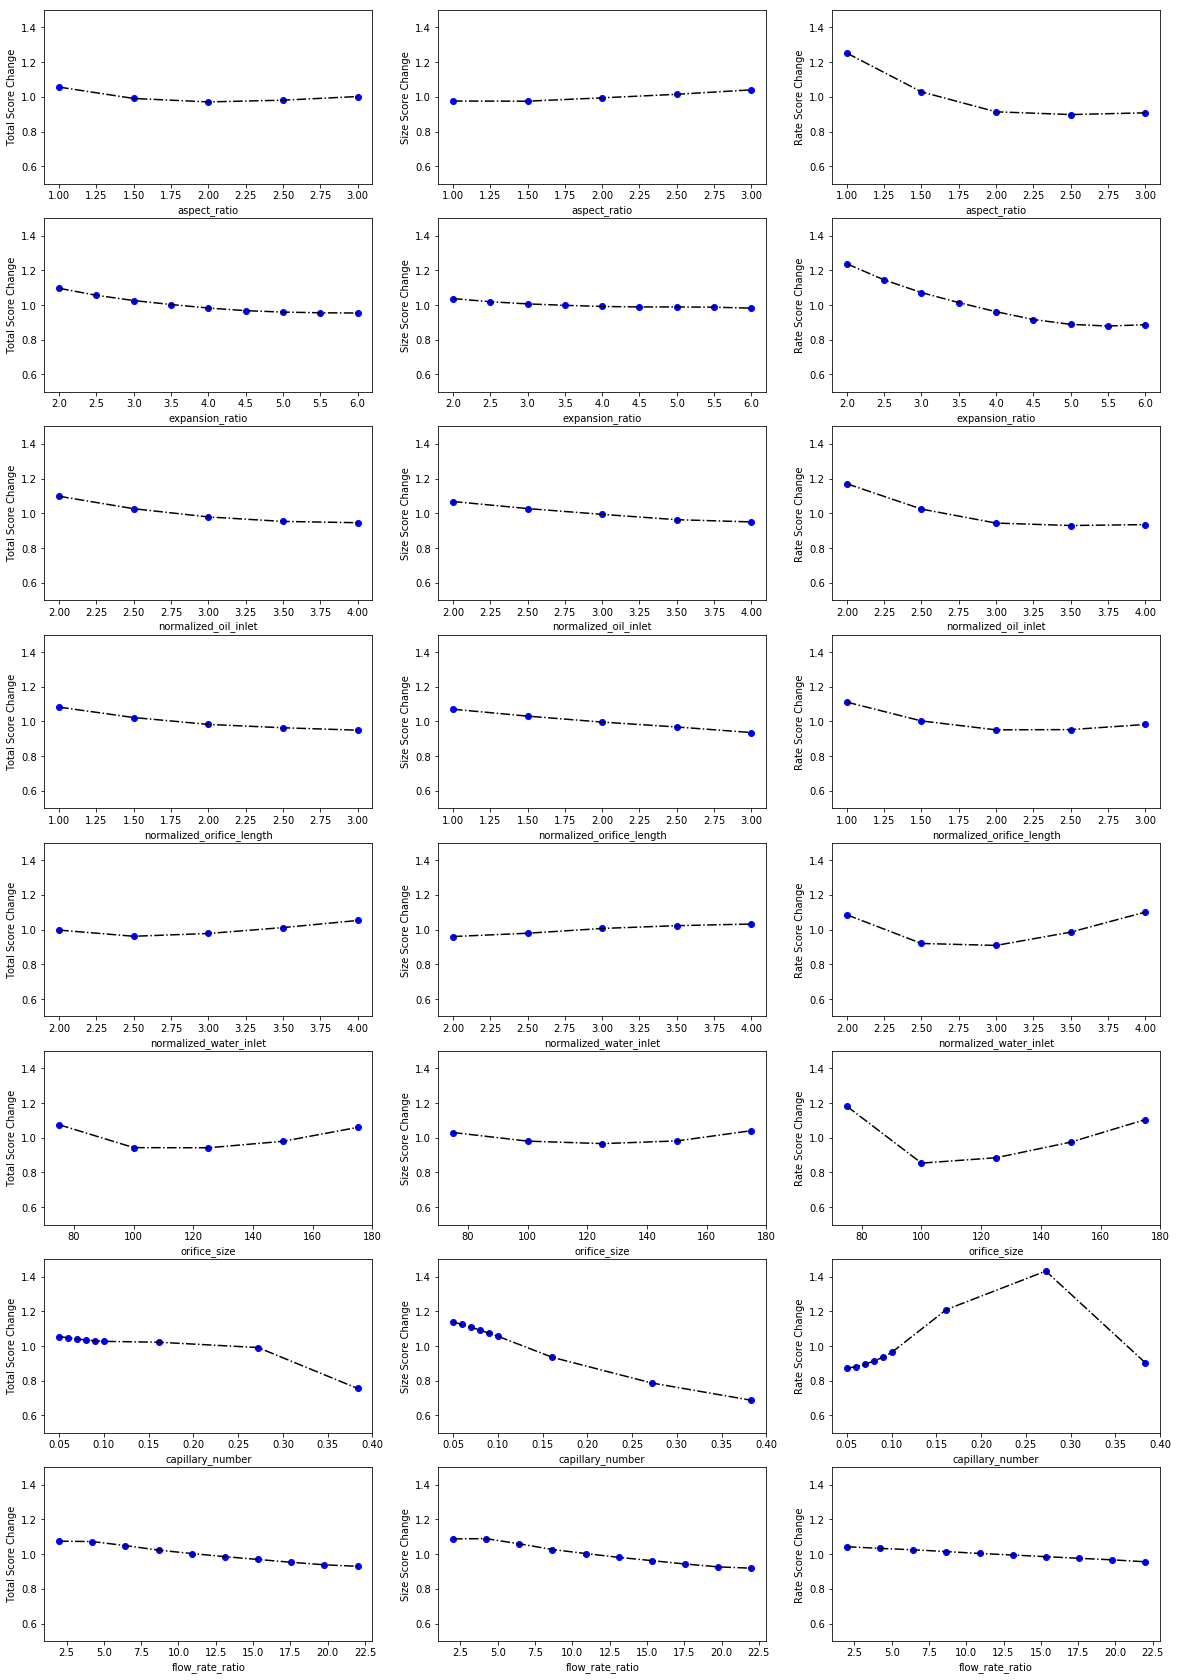

In [85]:
fig, axs = plt.subplots(8,3, figsize=[20,30])

for i, param in enumerate(meff_vals.keys()):
    mean_score = np.mean(meff_vals[param]["score_avgs"])
    mean_size_score = np.mean(meff_vals[param]["size_score_avgs"])
    mean_rate_score = np.mean(meff_vals[param]["rate_score_avgs"])
    
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_score_avgs"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_score_avgs"]/mean_rate_score
    
    score_std_normed =  meff_vals[param]["score_std"]/mean_score
    size_score_std_normed = meff_vals[param]["size_score_std"]/mean_size_score
    rate_score_std_normed = meff_vals[param]["rate_score_std"]/mean_rate_score
    
    
    
    axs[i][0].plot(param_range, score_normed,"bo")
    #axs[i][0].errorbar(param_range, score_normed, yerr=score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i][0].plot(param_range, score_normed, "k-.")
    
    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0.5, 1.5])
        
    #axs[i][1].errorbar(param_range, size_score_normed, yerr=size_score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i][1].plot(param_range, size_score_normed,"bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    
    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0.5, 1.5])
    
    #axs[i][2].errorbar(param_range, rate_score_normed, yerr=rate_score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i][2].plot(param_range, rate_score_normed,"bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0.5, 1.5])
    
##plt.savefig('Robust_MainEffect_Dripping.png')

In [119]:
from sklearn.feature_selection import f_regression, mutual_info_regression
X = np.zeros([all_results.shape[0], len(meff_cols)])
for i, col in enumerate(meff_cols):
    X[:,i] = all_results.loc[:, col]
Y = all_results.loc[:, "score_fab"]
f_test_all, _ = f_regression(X,all_results.loc[:, "score_fab"])
f_test_size, _ = f_regression(X,all_results.loc[:, "size_score_fab"])
f_test_rate, _ = f_regression(X,all_results.loc[:, "rate_score_fab"])
F = pd.DataFrame([f_test_all, f_test_size, f_test_rate], columns=meff_cols, index=["score_fab", "size_score_fab", "rate_score_fab"])

In [120]:
F

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,capillary_number,flow_rate_ratio
score_fab,175641.603297,394099.650508,815.332641,112950.263900,28186.183238,6748.397069,99766.044479,90418.268947
size_score_fab,46513.348251,4302.088577,17828.348693,29904.309743,1899.136351,519385.163741,60610.810462,137269.513831
rate_score_fab,147321.603248,578946.958536,12991.570674,95911.796681,33001.998259,79724.895873,58106.528796,23344.062221
